# Bank Exploratory Data Analysis

# 1. Setup

## Import Packages

In [172]:
# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Set Theme

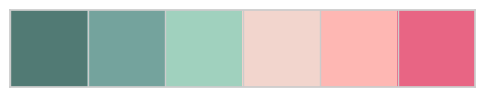

In [173]:
# Define your custom colors
palette = ['#517a74','#74a39d', '#a0d1be', '#f2d5cd','#feb7b3', '#e86584']
palette2 = sns.color_palette(['#517a74','#e86584'])
sns.set_theme(style='whitegrid', palette=palette)
# Set the custom palette
sns.set_palette(palette)
sns.palplot(palette)


**Load Dataset**

In [174]:
#change directory
# os.chdir('C:/Users/tunhi/OneDrive/Documents/Github/bankchurn')

# Load dataset into a dataframe
df = pd.read_csv('data\churn_data.csv')

# Display first few rows of the dataframe
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# 2. Data Discovery

In [175]:
# How large is the dataset
df.size

140000

In [176]:
# Gather basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


- Dataset contains 14 features and 10000 rows, totaling to 140,000 values. 
- Each row represents a bank customer while the columns store the customer's bank information
- There are 7 Numeric variables: RowNumber, CustomerId ,CreditScore, Age, Tenure, Balance, EstimatedSalary   
- There are 7 categorical variables: Surname, Gender, Geography, NumOfProducts, HasCrCard, IsActiveMember, Exited. 

**Quick Stats**

In [177]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**View Distribution**

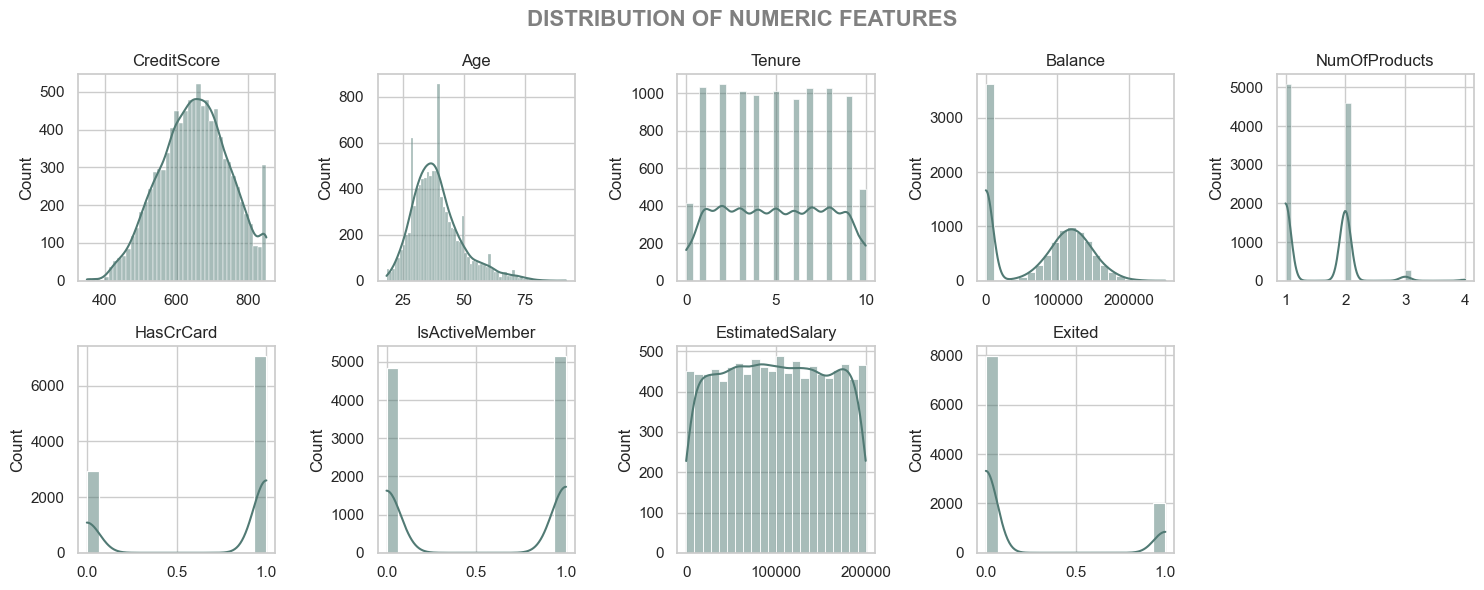

In [178]:
# Assuming you have a DataFrame named 'data' with numeric features

# Exclude RowNumber and CustomerId columns
data = df.iloc[:,2:]

# Get the list of numeric columns
numeric_columns = data.select_dtypes(include=['int64','float64']).columns

# Calculate the number of rows and columns needed for 5 graphs per row
num_rows = int(len(numeric_columns) / 5) + (len(numeric_columns) % 5 > 0)
num_cols = 5

# Create a figure and subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 3 * num_rows))

# Add an overall title
plt.suptitle("DISTRIBUTION OF NUMERIC FEATURES",fontsize=16,fontweight="bold",color="grey")

# Iterate through the numeric columns and plot histograms
for i, col in enumerate(numeric_columns):
    row = i // num_cols
    col_index = i % num_cols
    ax = axes[row, col_index]
    sns.histplot(data[col], ax=ax, kde=True)
    ax.set_title(col)

    # Remove axis ticks and labels
    ax.set_xlabel('')

# Hide the last subplot (if there are any extra subplots)
if num_rows * num_cols > len(numeric_columns):
    axes[num_rows - 1, num_cols - 1].set_visible(False)

# Adjust spacing between subplots
plt.tight_layout()


# Show the plot
plt.show()

- `Credit Score` ranges from 350 to 850 with an average of 650 and a slight skew to the left

- `Age`: The typical customer is around **38 years old**, with ages ranging from 18 to 92. The age distribution leans towards younger individuals.

- `Tenure`: Customers have been with the bank for an average of 5 years with lowest tenure in year 0 and 10.

- `Balance`: Account balances vary greatly, from zero up to $250,000. There's overwhelming number of customers with a zero balance.

- `NumOfProducts`: Most customers have only 1 or 2 products and few have 3 to 4 products. 

- `HasCrCard`: Most customers have a credit card. 

- `IsActiveMember`: There is almost even split on between active and inactive customers with more on the active side. 

- `EstimatedSalary`: Customers estimated salaries show a broad range, falling between $11.58 and $199,000 with a uniform distribution 

- `Exited`: The target variable, whether a customer exited the bank or not. It is highly imbalanced with a ratio of 8:2.

# 3. Data Cleaning

## Drop variables
- The `CustomerId` and `Surname` variable has sensitive customer data and should be removed to maintain confidentally. 
- `Gender` should also be removed as it would be discrimatory to offer promotions based on gender.
- `RowNumber` can also be removed has it is just a counter. 

In [179]:
df = df.drop(['CustomerId','Surname','RowNumber','Gender'],axis=1)
df.head()

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,41,1,83807.86,1,0,1,112542.58,0
2,502,France,42,8,159660.80,3,1,0,113931.57,1
3,699,France,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,43,2,125510.82,1,1,1,79084.10,0


## Handle Missing Values

In [180]:
print('Missing values per column:')
df.isna().sum()

Missing values per column:


CreditScore        0
Geography          0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

There are no missing values in the dataset.

## Handle Duplicates

In [181]:
print('No. of Duplicates:', df.duplicated().sum())

No. of Duplicates: 0


## Handle Outliers

In [182]:
# Separate numerical columns 
num_cols = df.select_dtypes(include=['int32','int64','float64']).columns.tolist()


print('Outliers Detected')

# Print total rows of outliers
unique_outlier_rows = set()
total_outliers = 0


# Loop to cycle through numerical columns and calculate IQR for each 
for col in num_cols:
    Q1 = np.quantile(df[col], 0.25)
    Q3 = np.quantile(df[col], 0.75)
    IQR = Q3 - Q1
    upper_limit = round(Q3 + 1.5 * IQR, 2)
    lower_limit = round(Q1 - 1.5 * IQR, 2)

    outliers = df[(df[col] > upper_limit) | (df[col] < lower_limit)]
    

    if len(outliers) > 0:
        print(f'{len(outliers):>10}','rows in',f'{col:<20}',f'lower: {lower_limit:<10}', "/   ", f'upper: {upper_limit}')
        unique_outlier_rows.update(outliers.index)
        total_outliers += len(outliers)

        percent_outliers = (len(outliers)/len(df)*100)

print(percent_outliers,'% in dataset')

Outliers Detected
        15 rows in CreditScore          lower: 383.0      /    upper: 919.0
       359 rows in Age                  lower: 14.0       /    upper: 62.0
        60 rows in NumOfProducts        lower: -0.5       /    upper: 3.5
      2037 rows in Exited               lower: 0.0        /    upper: 0.0
20.369999999999997 % in dataset


NumOfProducts and Exited are categorical instead of numeric values. Therefore, we'll exclude them as outliers. 

### Visualize Outliers

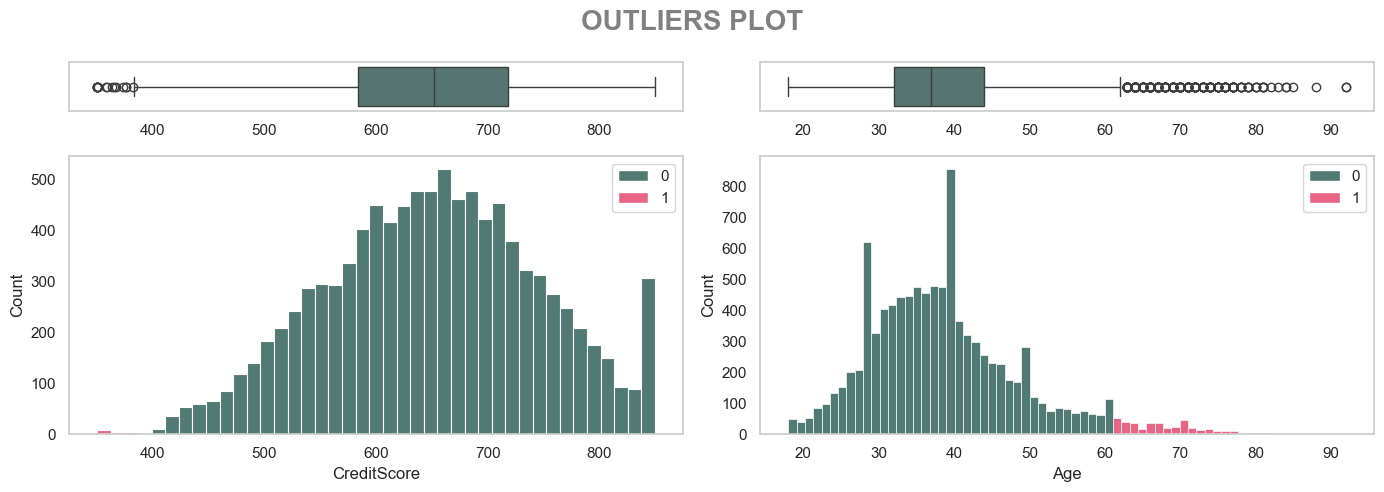

In [183]:
# Create a list of outliers columns 
outlier_cols = ['CreditScore','Age']

# Create the figure with 2 rows and 3 columns
fig, axes = plt.subplots(2, 2, figsize=(14, 5), sharex=False, gridspec_kw={"height_ratios": (.15, .85)})

plt.suptitle('OUTLIERS PLOT', fontsize=20, fontweight='bold',color='grey')

# variable to filter outliers in the data
outliers1 =  np.where((df['CreditScore'] >= 919) | (df['CreditScore'] <= 383), 1, 0)
outliers2 =  np.where((df['Age'] >= 62) | (df['Age'] <= 14), 1, 0)


# Loop through the outlier columns and create subplots
for i, col in enumerate(outlier_cols):
    row, col_idx = divmod(i, 2)  # Calculate row and column indices
    
    # Create boxplot on first row
    axes[row, col_idx] = sns.boxplot(data=df, x=col, orient="h", ax=axes[row, col_idx])
    axes[row, col_idx].set(xlabel='')  # Remove x-axis label for boxplot
    axes[row, col_idx].grid(False)  # Remove grid
    plt.xlabel('')

    # Variable to filter outliers in the data
    if i == 0:  # For the first loop iteration (col == 'CreditScore')
        outliers = outliers1
    else:  # For the second loop iteration (col == 'Age')
        outliers = outliers2
   
    # Create histogram on second row
    sns.histplot(data=df, x=col, ax=axes[row + 1, col_idx], hue=outliers, palette=palette2,alpha=1)
    axes[row + 1, col_idx].grid(False)  # Remove grid 


# Adjust spacing between subplots (optional)
plt.tight_layout()

# Show the plot
plt.show()

- Outliers are detected for `CreditScore` and `Age` features. 
- `CreditScore`: There are 15 customers with credit scores under 383. 
- `Age`: There are 359 customers over the age of 62

- We'll postpone treatment for these after the analysis

# Data Analysis

### Target Variable = `Exited`

**Check Class Imbalance**

In [184]:
# Get percentage of distinct values
df['Exited'].value_counts(normalize=True)*100

Exited
0    79.63
1    20.37
Name: proportion, dtype: float64

Out of 10,000 customers, a little over 2,000 (20.37%) have churned. This means that the bank retains a bit less than 80% of its customers.

While a perfect 50-50 split between churning and retained customers is ideal, an 80-20 split is still considered workable for analysis. This suggests that there's a good base of loyal customers to build on and target for further growth.

### CreditScore


According to FICO, Credit Score rating as categorized as follows
 Code | Rating Description | Range |
---| --- | --- | 
1 | Very poor | 300 to 579 |
2 | Fair | 580 to 669
3 | Good | 670 to 739
4 | Very good | 740 to 799
5 | Excellent | 800 to 850

#### Feature Engineering

Create a new variable `CreditCode` to assign each CreditScore to a rating

##### CreditRating

In [185]:
# Create a new 'CreditRating' variable and assign based FICO ranges
df['CreditCode'] = np.select(
    [df['CreditScore'] <=579,
     df['CreditScore'].between(580, 669),
     df['CreditScore'].between(670, 739),
     df['CreditScore'].between(740, 799),
     df['CreditScore'].between(800, 859)],
    ['1', '2', '3', '4','5']
    )

df[['CreditScore','CreditCode']].head()


,CreditScore,CreditCode
0,619,2
1,608,2
2,502,1
3,699,3
4,850,5


In [186]:
df=df.drop('CreditScore', axis=1)
df.columns

Index(['Geography', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'CreditCode'],
      dtype='object')

**Plot CreditRating vs Exited**

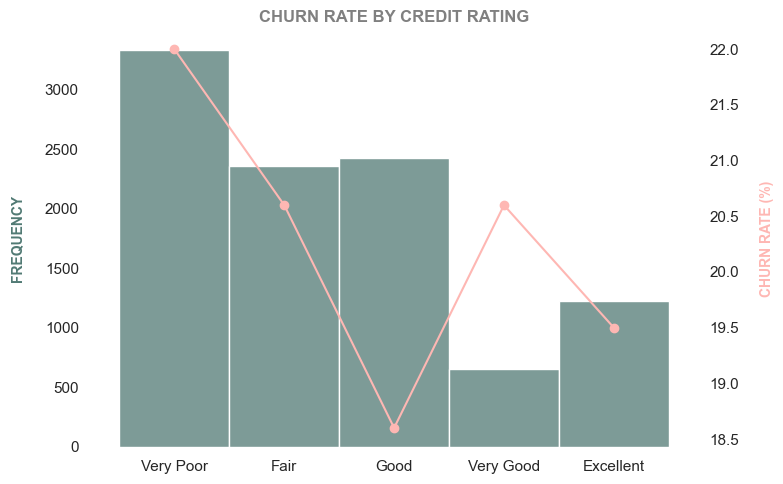

In [187]:
# Group by credit rating bins and calculate churn rate (percentage)
churn_rate_by_bin = round(df.groupby('CreditCode')['Exited'].mean() * 100, 1)

# Create a figure and subplots
fig, ax1 = plt.subplots(figsize=(8, 5))

# Custom labels for the x-axis
custom_labels = ['Very Poor', 'Fair', 'Good', 'Very Good', 'Excellent']
plt.xticks(ticks=range(0, 5), labels=custom_labels)


# Plot the histogram with a descriptive label
sns.histplot(data=df, x='CreditCode', ax=ax1, color='#517a74')


# Create a secondary y-axis for churn rate
ax2 = ax1.twinx()

# Plot the churn rate as a line with a marker and a clear label
ax2.plot(churn_rate_by_bin.index.astype(str), churn_rate_by_bin, color='#feb7b3', marker='o')

# Set informative labels for both axes
ax1.set_xlabel('')
ax1.set_ylabel('FREQUENCY',labelpad=15,fontsize=10, fontweight='bold',color='#517a74')
ax2.set_ylabel('CHURN RATE (%)',labelpad=15,fontsize=10, fontweight='bold',color='#feb7b3')

# Remove unnecessary ticks for a cleaner look
ax1.tick_params(left=False, bottom=False)
ax2.tick_params(right=False, bottom=False)
sns.despine(left=True, bottom=True) # Remove borders 

# Hide gridlines on both axes
ax1.grid(False)
ax2.grid(False)

# Add a title that summarizes the plot
plt.title('CHURN RATE BY CREDIT RATING', fontsize=12, fontweight='bold',color='grey')

# Adjust spacing between elements for readability
plt.tight_layout()

# Display the plot
plt.show()

The plot suggests a positive relationship between credit score and customer retention. However, the relatively small difference in churn rates between "Very Poor" and "Excellent" credit scores indicates that other factors likely play a significant role in customer churn.

## HasCrCard

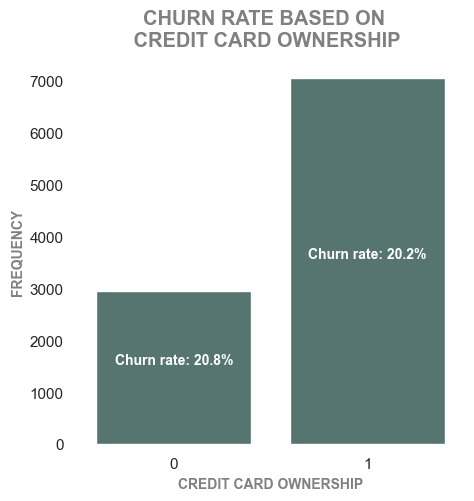

In [188]:

# Create figure and subplots with suptitle
plt.figure(figsize=(5, 5))
plt.suptitle('CHURN RATE BASED ON\n CREDIT CARD OWNERSHIP', fontweight='bold', color='grey')

# Countplot with vertical bars
ax = sns.countplot(x="HasCrCard", data=df)  # Set orientation to 'v' for vertical bars
sns.despine(left=True, bottom=True) # Remove borders 

# Get the counts
counts = df['HasCrCard'].value_counts(ascending=False).values

# Calculate percentages (assuming 'Exited' exists in df)
if 'Exited' in df.columns:
    percentages = (df.groupby('HasCrCard')['Exited'].mean() * 100).tolist()
else:
    # Handle the case where 'Exited' is not available
    percentages = [0] * len(counts)  # Placeholder if no 'Exited' column

# Create labels with percentages
labels = [f"Churn rate: {percentage:.1f}%" for value, percentage in zip(counts, percentages)]

# Label bars with percentages (adjust vertical offset as needed)
for j, (patch, label) in enumerate(zip(ax.patches, labels)):
    x_center = patch.get_x() + patch.get_width() / 2  # Calculate x-center
    y_center = patch.get_y() + patch.get_height() / 2  # Calculate y-center
    ax.text(x_center, y_center + 0.2, label, ha='center', va='bottom', fontweight='bold', fontsize=10, color='white')

plt.xlabel('CREDIT CARD OWNERSHIP',fontsize=10, fontweight='bold',color='grey') 
plt.ylabel('FREQUENCY',fontsize=10, fontweight='bold',color='grey')
ax.grid(False)

plt.show()


- The data reveals a surprising finding about customer churn in relation to credit card ownership.
- Both customer groups with and without credit cards have very similar churn rates.
- Among customers who have a credit card (7K+), around 1400 churned, resulting in a churn rate of approximately 20.2%.
- Similarly, for customers who don't have a credit card (~3000~), 613 churned, representing a churn rate of around 20.8%.
- It's unexpected that credit card ownership doesn't have a clearer impact on churn.
- While the churn rates are slightly different, the difference is minimal.

## Age

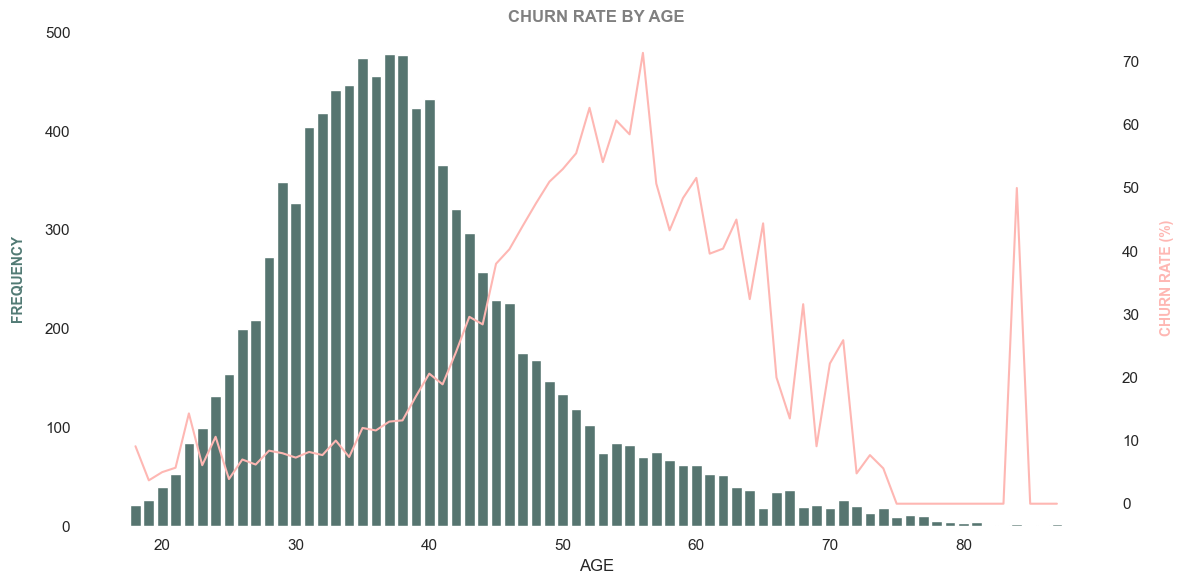

In [189]:
# Group by credit rating bins and calculate churn rate (percentage)
churn_rate_by_age = round(df.groupby('Age')['Exited'].mean() * 100, 1)

# Create a figure and subplots
fig, ax1 = plt.subplots(figsize=(12, 6))

# Add a title that summarizes the plot
plt.title('CHURN RATE BY AGE', fontsize=12, fontweight='bold',color='grey')

# Plot the histogram with a descriptive label
sns.countplot(data=df, x='Age', ax=ax1, color='#517a74')

# Set x-axis interval
plt.xticks(range(2, 98, 10))

# Create a secondary y-axis for churn rate
ax2 = ax1.twinx()

# Plot the churn rate as a line with a marker and a clear label
ax2.plot(churn_rate_by_age.index.astype(str), churn_rate_by_age, color='#feb7b3')

# Set informative labels for both axes
ax1.set_xlabel('AGE')
ax1.set_ylabel('FREQUENCY',labelpad=15, fontsize=10, fontweight='bold',color='#517a74')
ax2.set_ylabel('CHURN RATE (%)',labelpad=15, fontsize=10, fontweight='bold',color='#feb7b3')



# Remove unnecessary ticks for a cleaner look
ax1.tick_params(left=False, bottom=False)
ax2.tick_params(right=False, bottom=False)
sns.despine(left=True, bottom=True) # Remove borders 

# Hide gridlines on both axes
ax1.grid(False)
ax2.grid(False)

# Adjust figure size
plt.tight_layout()

# Display the plot
plt.show()

- 30-40 year olds make up the largest age group
- While the 40-50 age group has the most number of exits the highest churn rate of 70% occurs in 50-60 age bracket.
- This suggests a higher churn rate for customers over 40 compared to those under 40.

## Age Vs Balance

In [190]:
# create interval range 
interval_range = pd.interval_range(start=10, freq=10, end=100)

#create a new column applying the bins
df['AgeGroup'] = pd.cut(df['Age'], bins=interval_range, labels=[1,2,3])

#show original and new column with bins
df[['Age','AgeGroup']].head()

,Age,AgeGroup
0,42,"(40, 50]"
1,41,"(40, 50]"
2,42,"(40, 50]"
3,39,"(30, 40]"
4,43,"(40, 50]"


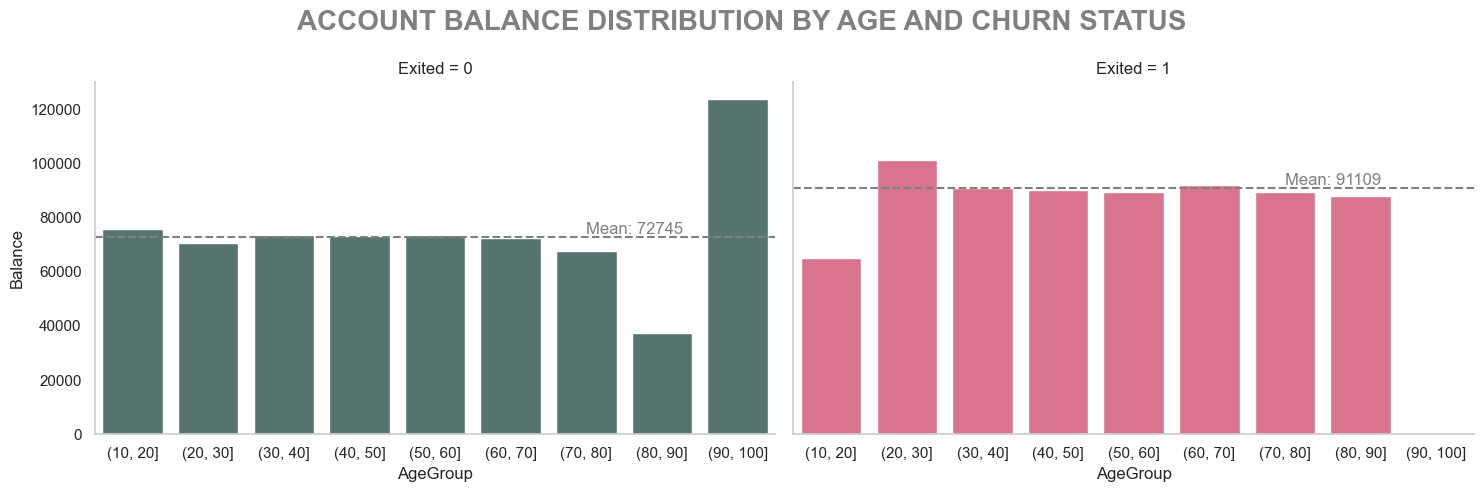

In [205]:

# Create a facet grid with one row
g = sns.FacetGrid(df, col="Exited", height=5, aspect=1.5, hue="Exited",palette=palette2)

# Add a title that summarizes the plot
g.figure.suptitle('ACCOUNT BALANCE DISTRIBUTION BY AGE AND CHURN STATUS', fontsize=20, fontweight='bold',color='grey')

# Plot a bar chart for Balance on the x-axis for each facet
g.map_dataframe(sns.barplot, x="AgeGroup", y="Balance",errorbar=None)

ax1, ax2 = g.axes[0]

mean0 = df.groupby('Exited')['Balance'].mean()[0]
mean1 = df.groupby('Exited')['Balance'].mean()[1]

ax1.axhline(mean0, ls='--',color="grey")
ax2.axhline(mean1, ls='--',color="grey")

ax1.text(6,74000, f'Mean: {mean0:.0f}', color="grey")
ax2.text(6,92000, f'Mean: {mean1:.0f}', color="grey")

ax1.grid(False)
ax2.grid(False)

plt.tight_layout()
plt.show()

- Customers who remained has an average balance around $72000.
- On average, customers who left the bank, took with them around $91K in balance. 
- In total, the customers who left took ~185M with them!
- Do benefits decrease after reaching $90,000 in accumulated balance?
- This is a significant loss for the bank.


## Balance

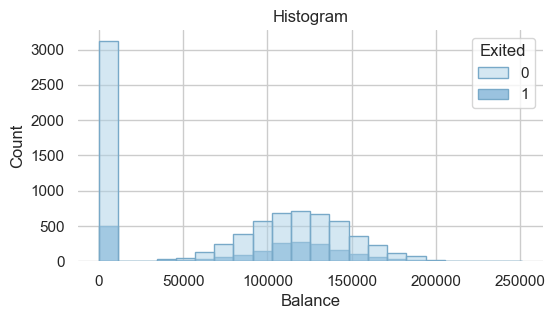

In [206]:
# Plot Histogram
fig = plt.figure(figsize=(6,3
                          ))
ax = sns.histplot(x=df['Balance'], hue=df['Exited'], palette='Blues', edgecolor='#78a9c8')
ax.tick_params(left=False, bottom=False) # Remove ticks
sns.despine(left=True, bottom=True) # Remove borders borders
plt.title('Histogram')
None

- Over 3500 customers or 35% of the customers have 0 balance. 
- If these customers are excluded, the balance data would follow a normal distribution
- What would cause customers to have bank account with no balance? Are they transferring money out of their account in preparation to exit? 
- Let's take a deeper dive into customers with 0 balance.

**Filter customers with zero Balance**

In [ ]:
# Create a Boolean mask 
mask = (df['Balance'] == 0)   
df_mask = df[mask]
df_mask.head()

**Plot**

In [ ]:
fig = plt.figure(figsize=(3,2))
ax = sns.countplot(x=df_mask['Balance'], hue=df_mask['Exited'], palette='Blues')
ax.tick_params(left=False, bottom=False) # Remove ticks
sns.despine(left=True, bottom=True) # Remove borders borders


- A significant portion (over 3,500 or 35%) of customers have zero balance.
- Interestingly, a quarter (around 500) of those with zero balance have exited.
- Notably, this represents a large portion (around 25%) of all exiting customers (2,037), suggesting a potential link between zero balance and customer churn.

**Create another mask for customers with 0 balance and have Exited**

In [ ]:
# Create a Boolean mask 
mask = (df['Balance'] == 0) &  (df['Exited'] == 1)
df_mask_churn = df[mask]
df_mask_churn.head()


In [ ]:
# create 4 row x 2 column figure
fig, axes = plt.subplots(4, 2, figsize=(15, 15))
fig.suptitle('Trends for customers with no balance and have exited')
sns.countplot(ax=axes[0,0], x=df_mask_churn['Tenure'], palette='Blues')
sns.countplot(ax=axes[0,1], x=df_mask_churn['AgeBins'], palette='Blues')
sns.histplot(ax=axes[1,0], x=df_mask_churn['EstimatedSalary'], color='#b3cede', edgecolor='#78a9c8')
sns.histplot(ax=axes[1,1], x=df_mask_churn['CreditScore'], binwidth=100)
sns.countplot(ax=axes[2,0], x=df_mask_churn['NumOfProducts'], palette='Blues')
sns.countplot(ax=axes[2,1], x=df_mask_churn['HasCrCard'], palette='Blues')
sns.countplot(ax=axes[3,0], x=df_mask_churn['IsActiveMember'], palette='Blues')


# Remove ticks
ax.tick_params(left=False, bottom=False) 

# Remove borders borders
sns.despine(left=True, bottom=True) 

# add spacing between the rows
plt.subplots_adjust(hspace=1)

plt.show();

Here's a breakdown of the 500 customers who exited with zero balance:
- Short Tenure: Roughly 28% (around 140) left within the first two years of opening their account. This suggests they might not have found the value they were looking for early on.
- Millennial Focus: Around 40% (around 200) were between 30 and 40 years old. This age group may have different banking needs or priorities compared to other demographics.
- Limited Engagement: Over 60% (more than 300) only had one product with the bank. This indicates they might not have been fully utilizing the bank's offerings.
- Credit Card Users: More than 60% (more than 300) had a credit card. This doesn't necessarily explain their exit, but it could be a factor to consider.
- Inactive Accounts: Over 60% (more than 300) were not actively using their account. This inactivity could be a reason for the account closure or a sign of dissatisfaction.

## IsActiveMember


In [ ]:
# Separate numerical and categorical variables into different df
df['IsActiveMember'].value_counts()

Little more than half of the customers (5151) are active and the rest (4849) are inactive

In [ ]:
fig = plt.figure(figsize=(5,3))
ax = sns.countplot(x=df['IsActiveMember'], hue=df['Exited'], palette='Blues')
ax.tick_params(left=False, bottom=False) # Remove ticks
sns.despine(left=True, bottom=True) # Remove borders borders

In [ ]:
# Calculate churn rate
activeness = df['IsActiveMember'].unique().tolist()

for active in activeness:
    count = df[(df['IsActiveMember'] == active)].shape[0]
    Exited_count = df[(df['IsActiveMember'] == active) & (df['Exited'] == 1)].shape[0]
    percent_Exited = (Exited_count/count) * 100
    print(f" When customer's activeness = {active}, the % Exited = {percent_Exited:.1f}%" )


- Active customers churn at a rate of 14.3%.
- Inactive customers churn at a rate of 26.9%. This is 12.6 percentage points higher than the churn rate for active customers. In other words, inactive customers are 12.6% more likely to churn than active customers.

## NumOfProducts

In [ ]:
# Check unique values
df['NumOfProducts'].value_counts(normalize=True)*100

In [ ]:
# Plot
fig = plt.figure(figsize=(5,3))
ax = sns.countplot(x=df['NumOfProducts'], order=df['NumOfProducts'].value_counts(ascending=False).index, hue=df['Exited'], palette='Blues')
ax.tick_params(left=False, bottom=False) # Remove ticks
sns.despine(left=True, bottom=True) # Remove borders borders

In [ ]:
# Calculate churn rate
products = df['NumOfProducts'].sort_values(ascending=True).unique().tolist()

for product in products:
    count = df[(df['NumOfProducts'] == product)].shape[0]
    Exited_count = df[(df['NumOfProducts'] == product) & (df['Exited'] == 1)].shape[0]
    percent_Exited = (Exited_count/count) * 100
    print(f" When customer has {product} product, % Exited = {percent_Exited:.1f}%" )


- Customers can have up to 4 products 
- The data shows a clear connection between the number of products a customer holds and their likelihood of churning.
- Most Common, Most Churn: Over half (50.84%) of customers have only 1 product, and this group also has the highest number of churned customers (1409). This suggests they might not be finding enough value in the single product to justify staying.
- Sweet Spot: Customers with 2 products (45.9% of the base) have the lowest churn rate (7.6% or 348 customers). This indicates that having a couple of products increases engagement and loyalty.
- High Risk, High Churn: Customers with 3 or 4 products (a combined 3.26% of the base) have a very high churn rate (82.7% or all churned for 4 products). This suggests these customers might be overwhelmed by too many options or have niche needs not being met.
- These findings suggest that offering the right bundle of products can significantly impact customer retention.
- It might be beneficial to explore why customers with 3 or 4 products churn and tailor product recommendations for those with only 1 product.
       

## Geography

In [ ]:
df['Geography'].value_counts()

- The customer base comes from three European countries: France, Germany, and Spain. 
- France holds the majority with 5,014 customers, making up over half of the total.
- The remaining customers are distributed relatively evenly between Germany (2,509) and Spain (2,477).

In [ ]:
# Plot histogram
fig = plt.figure(figsize=(5,3))
ax = sns.countplot(x=df['Geography'], order=df['Geography'].value_counts(ascending=False).index, hue=df['Exited'], palette='Blues')
ax.tick_params(left=False, bottom=False) # Remove ticks
sns.despine(left=True, bottom=True) # Remove borders borders

In [ ]:
# Calculate churn rate for each country
countries = df['Geography'].unique().tolist()

for country in countries:
    count = df[(df['Geography'] == country)].shape[0]
    Exited_count = df[(df['Geography'] == country) & (df['Exited'] == 1)].shape[0]
    percent_Exited = (Exited_count/count) * 100
    print(f'Percent Exited in {country} {percent_Exited:.1f}%')


- Germany and France has similar number of customers churns but interestingly, churn rates vary across these regions.
- Germany has the highest churn rate at 32.4%
- France and Spain experience churn rates around 16.2% and 16.7% respectively.

Let's check customer balance for each country to gain additional insight

## Geography vs Balance

In [ ]:
fig = plt.figure(figsize=(5,3))

# Creat bar graph
plt.title('Avg. Bank Balance by Geography', fontsize='12', loc="center")
ax = sns.barplot(x=df['Geography'], y=df['Balance'], hue=df['Exited'], palette='Blues', errorbar=None)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1)) # legend location
sns.despine(left=True, bottom=True) # Remove borders
ax.tick_params(left=False, bottom=False) # Remove ticks




- Customers who churned in France and Spain took an average balance of $71,000 and $73,000, respectively.
- However, in Germany, churned customers took an average of nearly twice that amount, at $120,000. This suggests that German churned customers are leaving with a significantly higher balance compared to France and Spain.
- It's also worth noting that Germany has the highest churn rate at 32%, compared to France (16.2%) and Spain (16.7%).
- This could indicate that Germany is losing a higher proportion of customers with larger balances.
- Further investigation into the reasons behind churn in Germany might be beneficial to mitigate customer losses and the associated revenue impact.

Let's look at the distribution of customers balance across these countries.

In [ ]:
# Create violinplot showing distributions bank balance by geography


fig = plt.figure(figsize=(6,4))             # Set figure size
plt.title('Distribution of Customer Balance by Geography', fontsize='12', loc="left", fontweight="bold",pad=35)

# Add caption below the title
plt.text(0, 1.05, "Despite having a smaller customer base, Germany's customers'\nbalance are 2x higher than those in France and Spain. ", fontsize='9', transform=plt.gca().transAxes, ha="left")


ax = sns.violinplot(data=df,                # violin plot
                    x='Geography',
                    y='Balance', 
                    hue='Exited', 
                    palette='Blues', 
                    split="True", 
                    inner='quart', 
                    gap=0.1)


sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))        # Add legend
sns.despine(left=True, bottom=True)         # Remove borders 
ax.tick_params(left=False, bottom=False)    # Remove ticks
plt.show()                                  # Show Plot


- France and Spain: Around half of the customers in these countries maintain zero balances. 
    - Among those with balances (likely the more profitable customers), the churn rate is around 16% and they take an average of $71,000 - $73,000 with them when they churn.
- Germany: While Germany has a smaller overall customer base, its churn rate is significantly higher at 32.4%. 
    - Interestingly, German customers who churn tend to have much higher average balances of around $120,000. 
    - This means that despite having fewer customers, Germany experiences higher losses per churned customer due to these larger balances.

Focus on Germany: These findings highlight the importance of prioritizing improvements in Germany's customer service or product offerings. By addressing the reasons behind churn in Germany, the bank can potentially retain more high-value customers and mitigate significant revenue losses.

## Estimated Salary

In [ ]:
fig = plt.figure(figsize=(8,3))
ax = sns.histplot(x=df['EstimatedSalary'], hue=df['Exited'], binwidth=25000, color='Blues', edgecolor='#78a9c8')
ax.tick_params(left=False, bottom=False) # Remove ticks
sns.despine(left=True, bottom=True) # Remove borders borders
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1)) # legend location


- The salary range seems to be evenly spread across the customer base ("uniform distribution"). This means there aren't any specific salary brackets with a higher concentration of customers.
- Regardless of salary range, approximately 25% of customers churn (around 250 customers). This suggests that churn might be driven by factors other than salary.


## Tenure

In [ ]:
# Plot Histogram
fig = plt.figure(figsize=(8,3))
ax = sns.countplot(x=df['Tenure'], hue=df['Exited'], palette='Blues')
ax.tick_params(left=False, bottom=False) # Remove ticks
sns.despine(left=True, bottom=True) # Remove borders borders
plt.title('Histogram')
plt.xticks(rotation=45, ha='right')
None

In [ ]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing distributions of `satisfaction_level` by tenure, comparing employees who stayed versus those who left
sns.boxplot(data=df, x='Age', y='Tenure', hue='Exited', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize='14')

# Create histogram showing distribution of `tenure`, comparing employees who stayed versus those who left

sns.barplot(data=df, x='Age', y='Balance', hue='Exited',   ax=ax[1])
ax[1].set_title('Tenure histogram', fontsize='14')

plt.show();

- Tenure seems to be evenly distributed across the customer base ("uniform distribution"). Interestingly, the number of customer churns stays relatively consistent at around 200 people every year, except for the first and tenth years.
- Unlike other years, both year 1 and year 10 have a lower churn rate, with only around 100 customers churning in each of these years.

To understand the reasons behind the lower churn rates in year 1 and year 10, it would be beneficial to:

- Year 1 Retention: Investigate what the bank might be doing well to retain customers in the first year. It could be strong onboarding processes, competitive introductory offers, or meeting the initial needs of new customers effectively.
- Year 10 Loyalty: Explore why customers reach a decade with the bank and why they churn at a lower rate then. Possible explanations include established loyalty programs, inertia (less likely to switch after a long tenure), or the bank effectively catering to the needs of long-term customers.

# Feature Engineering

# Save file